Department of Physics, University of Pisa (AA 2020-2021)

### Multimessenger Physics Laboratory



## Data Analysis experience - Gravitational Waves 
#### (M. Razzano, Apr 23,2021)

This notebook serves as a tutorial for the data analysis experience of gravitational wave events from coalescing systems. This is just an *outline* that shows how to use some of the most useful functions. 
For your analysis you can use the sample file contained in the *code* directory and start working on it. If you want to put some library functions in an external Python file that you will import as a module (with the import command), please feel free to do it.

**Do not forget** to add the extra files that you might use for the analysis, e.g. the data files to this Github repository in the data directory

More details are contained in the PDF file containing the description of this experience, that is available on Moodle (e-learning)

### Basic Setup
First of all, we import the required modules and we download the data file.

In [10]:
import os   #These two are useful modules
import sys

#here you can import other useful modules, such as numpy, matplotlib, etc..
import numpy as np #Numerical Python
import matplotlib.pyplot as plt

#also import astropy.fits
from astropy.io import fits

**Important** Within the notebook you can run BASH command, by putting a ! before the command. For instance, if you want to run a ls command, type !ls

In [11]:
# you can run the pwd command (Print Working Directory) to see your directory
!pwd

/home/jovyan/exp-gw/tutorials


In [12]:
#or you can run ls command to list the directory where you are
# (-l indicates that you can see all the properties of the file)
!ls -l

total 732
-rw-r--r-- 1 jovyan users 746361 Apr 29 10:06 tutorial_basic_gw_analysis.ipynb


In [13]:
#or the one above you
!ls -l ../

total 56
drwxr-sr-x 2 jovyan users  4096 Apr 29 09:57 data
-rw-r--r-- 1 jovyan users 35149 Apr 29 09:57 LICENSE
-rw-r--r-- 1 jovyan users  1513 Apr 29 09:58 README.md
drwxr-sr-x 2 jovyan users  4096 Apr 29 09:57 report
drwxr-sr-x 2 jovyan users  4096 Apr 29 10:03 results
drwxr-sr-x 3 jovyan users  4096 Apr 29 10:06 tutorials


### Let's set some useful variables
The data are stored in a "data" directory at the same level of the "code" directory where you are now. Let's do some work to navigate the directory...
We will use the *os* module, in particular the *os.path* submodule.

**Note**: In this case we define the directories directly in this notebook, instead of using environment variables. For this examples, it is easier...

In [14]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data")
print("Data directory is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created!" % results_dir)
else:
    print("Results directory is %s" % data_dir)
    

I am in dir /home/jovyan/exp-gw/tutorials
Main directory is /home/jovyan/exp-gw
Data directory is /home/jovyan/exp-gw/data
Results directory is /home/jovyan/exp-gw/data


### Let's get started
After this basic setup, here below you can find some examples of analysis command

### Explore the GWOSC event dataset
Here we explore what events are on GWOSC and retrieve their data

In [15]:
#explore the events in the dataset
from gwosc.datasets import find_datasets
events = find_datasets(type="event")
print(events)

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190424_180648-v1', 'GW190425-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v1', 'GW190521-v2', 'GW190521-v3', 'GW190521_074359-v1', 'GW190527_092055-v1', 'GW190602_175927-v1', 'GW1

In [16]:
#Let's see the data relative to the first detection
#you will receive a list of files, that you could download in your data dir for future use,
#or just use the fetch command (see below) to use the files in real time 
ev_name = "GW150914"

#interferometer to use
ev_ifo = "H1"

from gwosc.datasets import event_gps
from gwosc.locate import get_event_urls

ev_gps = event_gps(ev_name)
event_urls = get_event_urls(ev_name)

print("%s,%.1f,%s" % (ev_name,ev_gps,event_urls))

GW150914,1126259462.4,['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


### Some basic operations on signal processing
Here we will select a time frame and see how we can have a quick look at the signal and do some basic filtering

In [24]:
from gwpy.timeseries import TimeSeries
from gwpy.segments import DataQualityFlag

# Select a time interval of 30 mins around the event. This is because on GWOSC there is 1 hour data window released around events
dt_win=3600*0.25
ev_t0_min = ev_gps-dt_win
ev_t0_max = ev_gps+dt_win

print("Get data for %s (%s) GPS: %.2f - %.2f" % (ev_name,ev_ifo,ev_t0_min,ev_t0_max))
    
#fetch the data. Use cache=True to keep the data in the cache memory (to speed things up)
data = TimeSeries.fetch_open_data(ev_ifo,ev_t0_min,ev_t0_max,cache=True)

#get the segments in a larger time window (just to have a bigger time span to look over)
segments = DataQualityFlag.fetch_open_data(ev_ifo+"_DATA",ev_t0_min-dt_win,ev_t0_max+dt_win)
print("Done")

Get data for GW150914 (H1) GPS: 1126258562.40 - 1126260362.40
Done


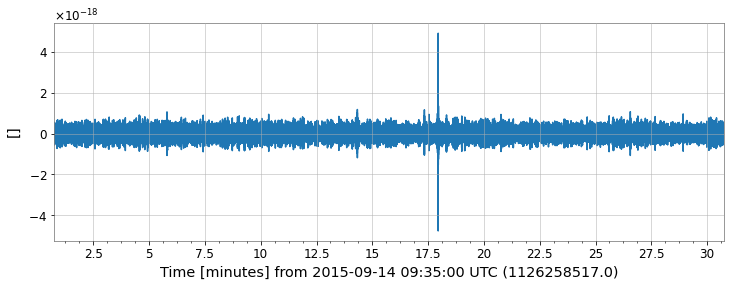

In [25]:
from gwpy.plot import Plot

#Plot raw data....   
plot_data=data.plot()
plot_data.show()

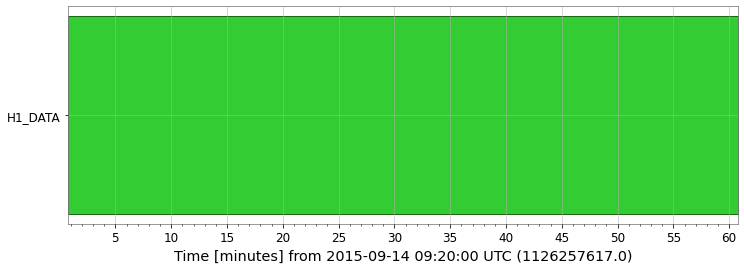

In [26]:
#..and segments. Green is data ok, red is data bad...
plot = segments.plot()

### Look at the data in the frequency domain
How to do create a PSD, then the ASD, and apply some basic filtering.

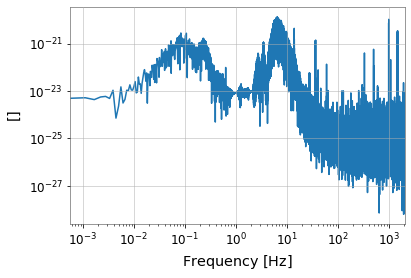

In [27]:
#Build the fft and plot it
fft_data = data.fft()
fft_plot = fft_data.abs().plot(xscale="log", yscale="log")
    

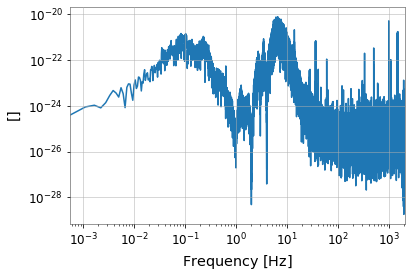

In [28]:
# This doesn't look correct at all! The problem is that the FFT works under the assumption that 
# our data are periodic, which means that the edges of our data look like discontinuities when transformed. 
# We need to apply a window function to our time-domain data before transforming, we will use the hann window

from scipy.signal import get_window
window = get_window('hann', data.size)
hwin = data * window

fftamp = hwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show()

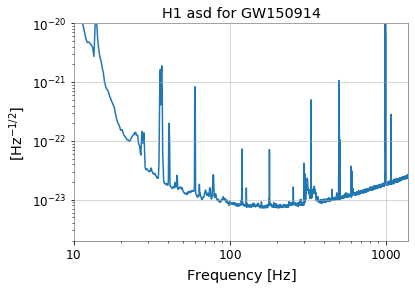

In [29]:
#Now we can plot the ASD as well, using GWPY and  the Welch method with a overlapping window of 4 seconds

asd = data.asd(fftlength=4, method="median")
plot = asd.plot()

ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-24, 1e-20)
ax.set_title(ev_ifo+ " asd for "+ev_name)
plot.refresh()

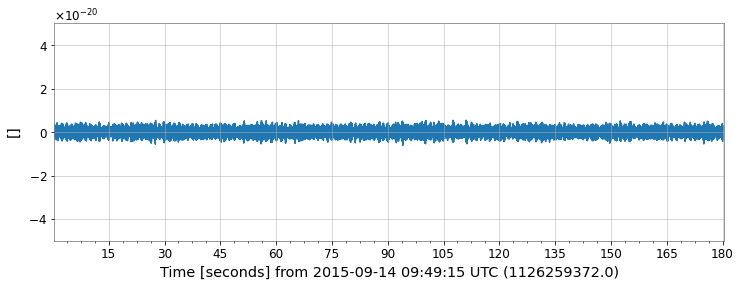

In [30]:
# WE can do some bandpass and see its effect

#First using a low-frequency bandpass
data_filtered=data.bandpass(16,64)

plot = data_filtered.plot()
ax = plot.gca()

#zoom around the event. Can we see something now?
ax.set_xlim(ev_gps-dt_win*0.1,ev_gps+dt_win*0.1)
ax.set_ylim(-5e-20,5e-20)
plot.refresh()

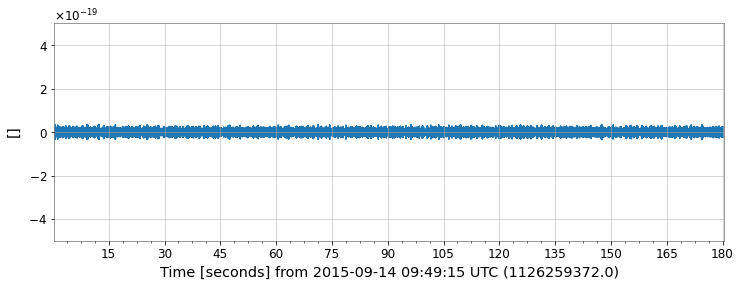

In [31]:

#then a high-frequency bandpass
data_filtered=data.bandpass(300,1000)

plot = data_filtered.plot()
ax = plot.gca()

#zoom around the event. Can we see something now?
ax.set_xlim(ev_gps-dt_win*0.1,ev_gps+dt_win*0.1)
ax.set_ylim(-5e-19,5e-19)
plot.refresh()

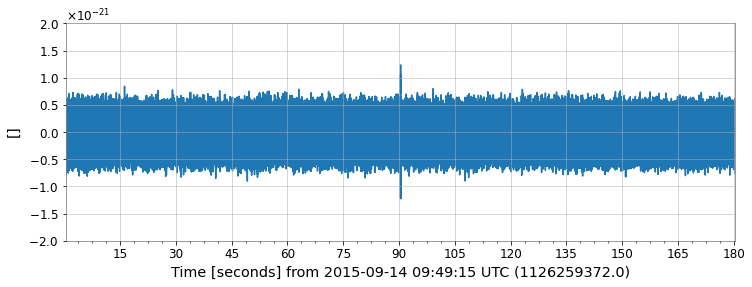

In [32]:

#then a medium frequency filter. Something is visible?
data_filtered=data.bandpass(50,250)

plot = data_filtered.plot()
ax = plot.gca()

#zoom around the event. Can we see something now?
ax.set_xlim(ev_gps-dt_win*0.1,ev_gps+dt_win*0.1)
ax.set_ylim(-2e-21,2e-21)
plot.refresh()

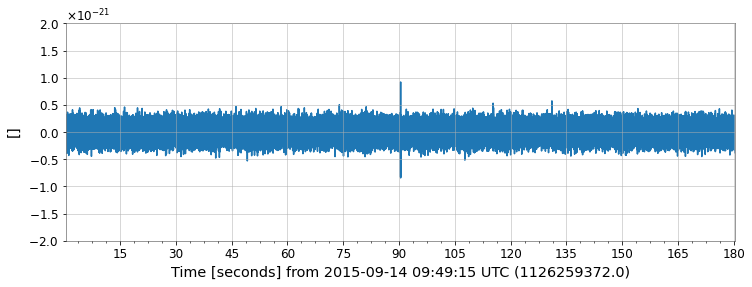

In [33]:

#then a medium frequency filter. Something is visible?
# One can also apply a notch filter in order to remove specific lines (in this case the power line at 60 Hz)
data_filtered=data.bandpass(50,250).notch(60)

plot = data_filtered.plot()
ax = plot.gca()

#zoom around the event. Can we see something now?
ax.set_xlim(ev_gps-dt_win*0.1,ev_gps+dt_win*0.1)
ax.set_ylim(-2e-21,2e-21)
plot.refresh()

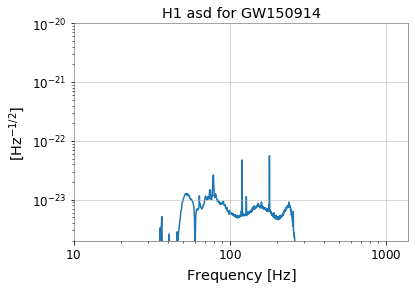

In [35]:
# one can take a look at the ASD of the filtered signal as well. This is a good double check on the filters that
# have been applied

asd = data_filtered.asd(fftlength=4, method="median")
plot = asd.plot()

ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-24, 1e-20)
ax.set_title(ev_ifo+ " asd for "+ev_name)
plot.refresh()

### Spectrograms
We can then see how the FFT evolves with time, e.g. doing a spectrogram 

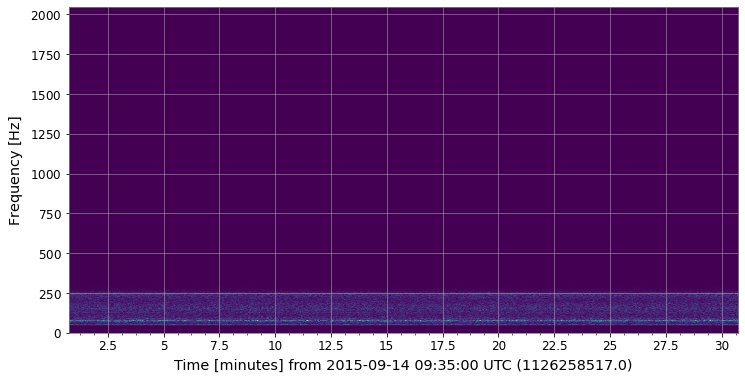

In [36]:
#now, the spectrograms
specgram = data_filtered.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

/opt/conda/lib/python3.8/site-packages/gwpy/plot/plot.py:395: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = super().colorbar(mappable, **kwargs)


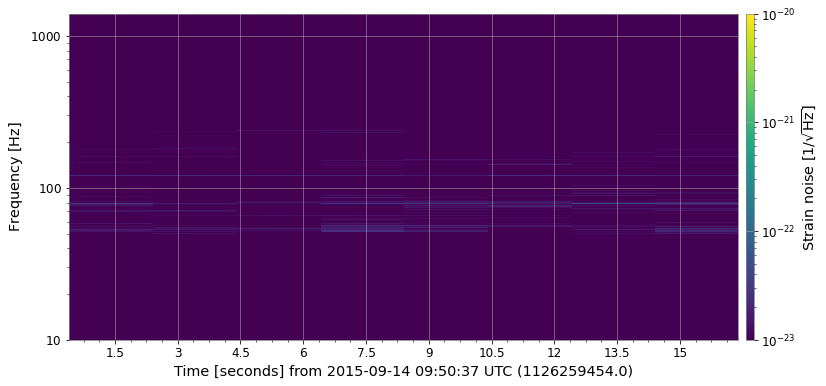

In [37]:
#We need to adjust the scale...

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.set_xlim(ev_gps-8, ev_gps+8)

ax.colorbar(
    clim=(1e-23, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

### Matched filtering and detection
For this part we will use the pyCBC package to run the matched filter

In [38]:

# Select a shorter time of 2 seconds around the event
dt_win=10
ev_t0_min = ev_gps-dt_win
ev_t0_max = ev_gps+dt_win

print("Get data for %s (%s) GPS: %.2f - %.2f" % (ev_name,ev_ifo,ev_t0_min,ev_t0_max))
    
#fetch the data. Use cache=True to keep the data in the cache memory (to speed things up)
data = TimeSeries.fetch_open_data(ev_ifo,ev_t0_min,ev_t0_max,cache=True)

#get the segments in a larger time window (just to have a bigger time span to look over)
segments = DataQualityFlag.fetch_open_data(ev_ifo+"_DATA",ev_t0_min-dt_win,ev_t0_max+dt_win)
print("Done")

Get data for GW150914 (H1) GPS: 1126259452.40 - 1126259472.40
Done


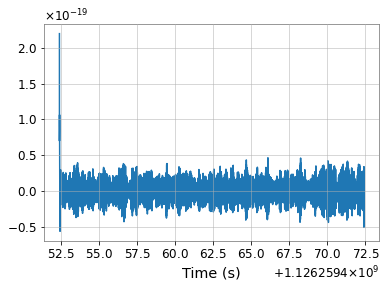

In [39]:
import pylab
from pycbc.filter import resample_to_delta_t, highpass

# Convert the data from gwpy to pyCBC format
strain = data.to_pycbc()

# Remove the frequencies below 15 Hz and downsample the data to 2048Hz
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

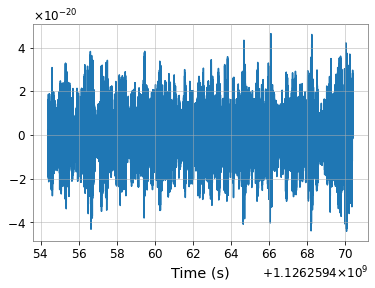

In [40]:
# Remove 2 seconds of data from both the beginning and end, to remove the ringing artifacts
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [43]:
#We can calculate the ASD and PSD also with pyCBC

from pycbc.psd import interpolate, inverse_spectrum_truncation

# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency. 
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

Text(0, 0.5, 'Strain')

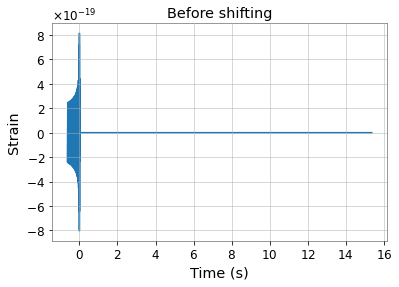

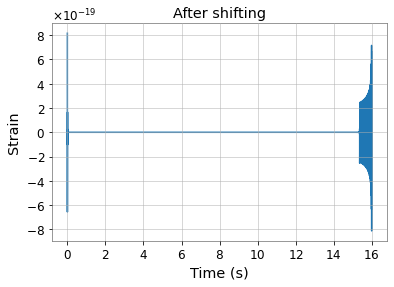

In [44]:
from pycbc.waveform import get_td_waveform
# In this case we "know" what the signal parameters are. In a search
# we would grid over the parameters and calculate the SNR time series
# for each one

# We'll assume equal masses, and non-rotating black holes which is within the posterior probability
# of GW150914. 
m_guess = 35 # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m_guess,
                     mass2=m_guess,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# We will resize the vector to match our data
hp.resize(len(conditioned))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the 
# first bin of the data.

# The cyclic_time_shift method shifts the timeseries by a given amount of time.
# It treats the data as if it were on a ring so points shifted off the end
# of the series reappear at the start. Note that time stamps are *not* in
# general affected (as the start time of the full array is shifted),
# but the index of each point in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to 
# shift the merger into position
pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

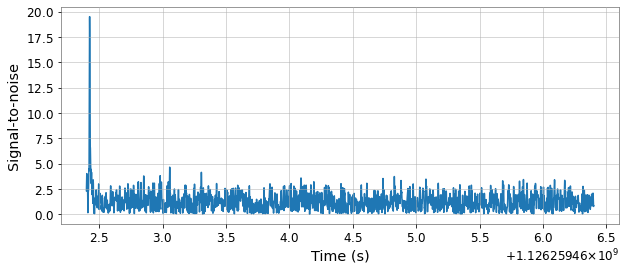

We found a signal at 1126259462.425293s with SNR 19.500135766825434


In [45]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why are we taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

In [46]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

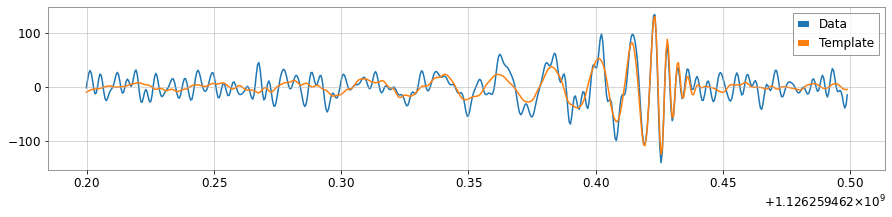

In [47]:
# We do it this way so that we can whiten (i.e. normalize the signal to the PSD) both the template and the data

white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()
white_template = (aligned.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(ev_gps-.2, ev_gps+.1)
white_template = white_template.time_slice(ev_gps-.2, ev_gps+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.show()

### Now, we can use the Q transform

/opt/conda/lib/python3.8/site-packages/gwpy/plot/axes.py:282: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  return super().pcolormesh(*args, **kwargs)


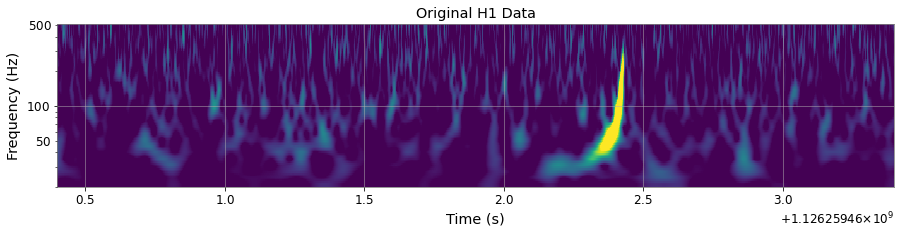

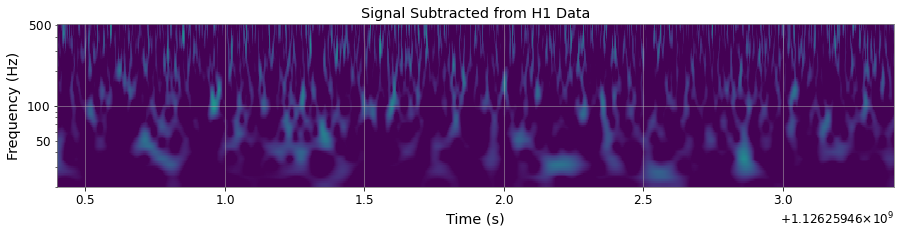

In [48]:
subtracted = conditioned - aligned

# Plot the original data and the subtracted signal data

for data, title in [(conditioned, 'Original H1 Data'),
                    (subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                           logfsteps=100,
                                           qrange=(8, 8),
                                           frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(ev_gps - 2, ev_gps + 1)
    pylab.show()